In [1]:
#IMPORT THE LIBRARIES
import pandas as pd
import numpy as np

import os
import sys

# librosa is a Python library for analyzing audio and music. It can be used to extract the data from the audio files we will see it later.
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# to play the audio files
import IPython.display as ipd
from IPython.display import Audio

# for cnn model
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM,BatchNormalization
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 


In [2]:
# path to the directory of the dataset
RAV = "/kaggle/input/ravdess-emotional-speech-audio/audio_speech_actors_01-24/"

In [3]:
dir_list = os.listdir(RAV)
dir_list.sort()

emotion = []
gender = []
path = []
for i in dir_list:
    fname = os.listdir(RAV + i)
    for f in fname:
        part = f.split('.')[0].split('-')
        emotion.append(int(part[2]))
        temp = int(part[6])
        if temp%2 == 0:
            temp = "female"
        else:
            temp = "male"
        gender.append(temp)
        path.append(RAV + i + '/' + f)

        
RAV_df = pd.DataFrame(emotion)
RAV_df = RAV_df.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'})
RAV_df = pd.concat([pd.DataFrame(gender),RAV_df],axis=1)
RAV_df.columns = ['gender','emotion']
RAV_df['labels'] =RAV_df.gender + '_' + RAV_df.emotion
RAV_df['source'] = 'RAVDESS'  
RAV_df = pd.concat([RAV_df,pd.DataFrame(path, columns = ['path'])],axis=1)
RAV_df = RAV_df.drop(['gender', 'emotion'], axis=1)
RAV_df.labels.value_counts()

male_fear          96
male_angry         96
male_happy         96
male_calm          96
female_disgust     96
male_sad           96
male_disgust       96
female_angry       96
female_happy       96
female_surprise    96
female_sad         96
female_fear        96
female_calm        96
male_surprise      96
male_neutral       48
female_neutral     48
Name: labels, dtype: int64

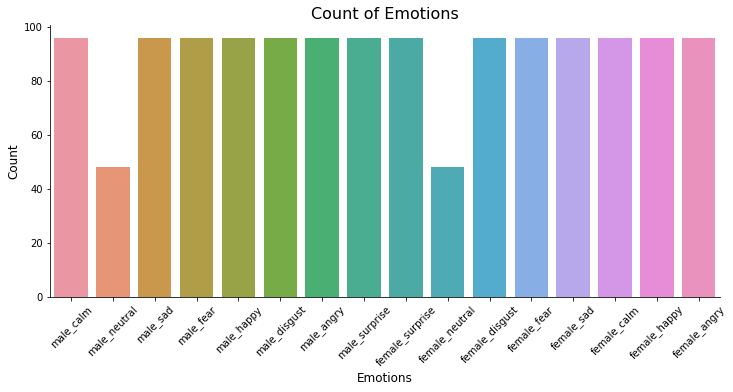

In [4]:
plt.figure(figsize=(12, 5))
plt.title('Count of Emotions', size=16)
sns.countplot(RAV_df.labels)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
plt.xticks(rotation=45)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

Now, we will compare mel spectograms of male and female neutral audio clips.

In [5]:
# MALE NEUTRAL
fname1=RAV+'Actor_01/03-01-01-01-01-01-01.wav'
data, sr = librosa.load(fname1)
ipd.Audio(fname1) 


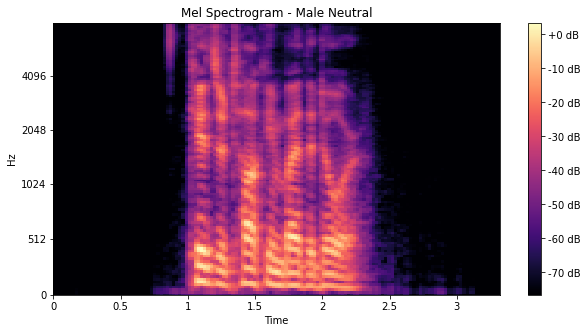

In [6]:
# CREATE LOG MEL SPECTROGRAM
plt.figure(figsize=(10, 5))
spectrogram = librosa.feature.melspectrogram(y=data, sr=sr, n_mels=128,fmax=8000) 
spectrogram = librosa.power_to_db(spectrogram)
librosa.display.specshow(spectrogram, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram - Male Neutral')
plt.colorbar(format='%+2.0f dB');

In [7]:
# FEMALE NEUTRAL
fname2=RAV+'Actor_14/03-01-01-01-01-01-14.wav'
data, sr = librosa.load(fname2)
ipd.Audio(fname2) 

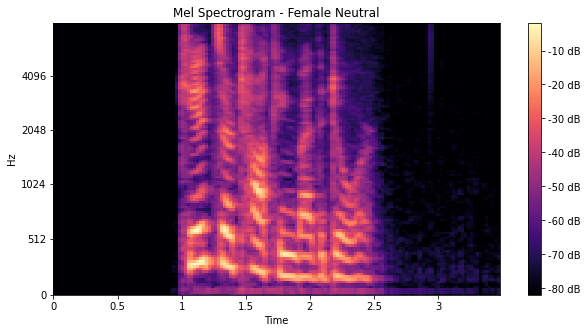

In [8]:
# CREATE LOG MEL SPECTROGRAM
plt.figure(figsize=(10, 5))
spectrogram = librosa.feature.melspectrogram(y=data, sr=sr, n_mels=128,fmax=8000) 
spectrogram = librosa.power_to_db(spectrogram)
librosa.display.specshow(spectrogram, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram - Female Neutral')
plt.colorbar(format='%+2.0f dB');

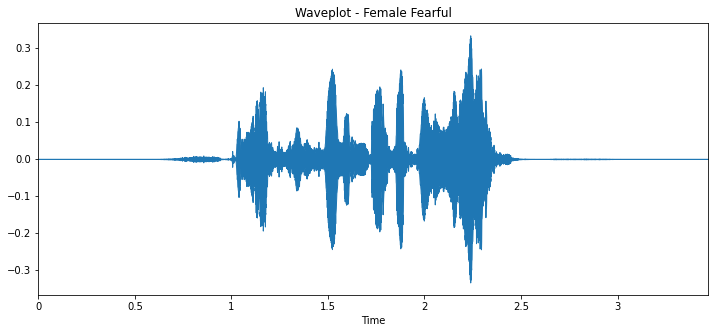

In [9]:
# Pick a fearful track
fname3 = RAV + 'Actor_14/03-01-06-02-02-02-14.wav'  
data, sr = librosa.load(fname3)
plt.figure(figsize=(12, 5))
librosa.display.waveplot(data, sr=sr)
plt.title('Waveplot - Female Fearful')
# Lets play the audio 
ipd.Audio(fname3)

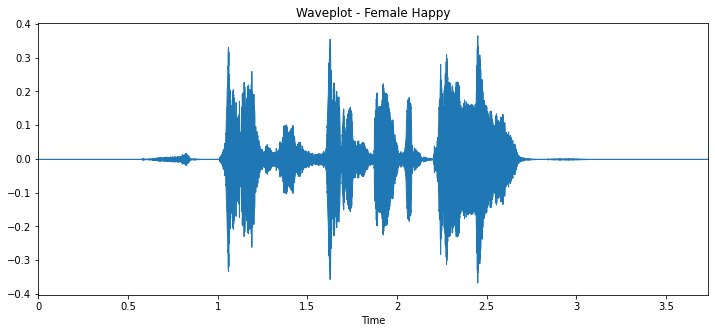

In [10]:
# Pick a happy track
fname4 = RAV + 'Actor_14/03-01-03-02-02-02-14.wav'  
data, sr = librosa.load(fname4)
plt.figure(figsize=(12, 5))
librosa.display.waveplot(data, sr=sr)
plt.title('Waveplot - Female Happy')

# Lets play the audio 
ipd.Audio(fname4)

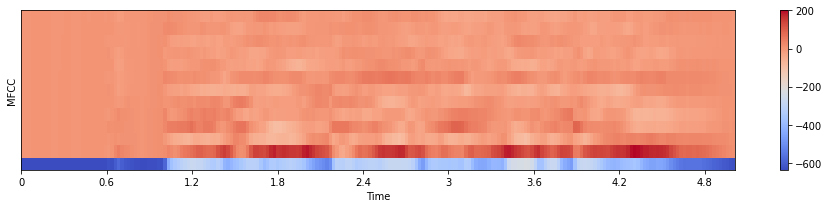

In [11]:
# Gender - Female; Emotion - Angry 
path = "/kaggle/input/ravdess-emotional-speech-audio/audio_speech_actors_01-24/Actor_08/03-01-05-02-01-01-08.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)


# MFCC
plt.figure(figsize=(16, 10))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

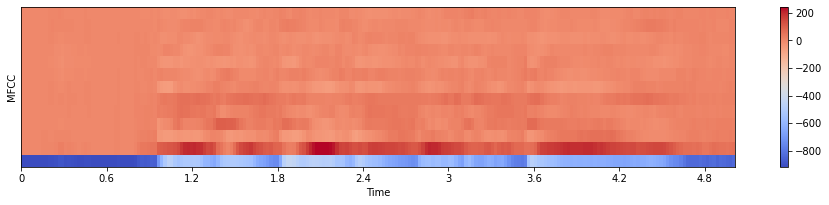

In [12]:
# Gender - Male; Emotion - Angry 
path = "/kaggle/input/ravdess-emotional-speech-audio/audio_speech_actors_01-24/Actor_09/03-01-05-01-01-01-09.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)


# MFCC
plt.figure(figsize=(16, 10))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

ipd.Audio(path)

216
216


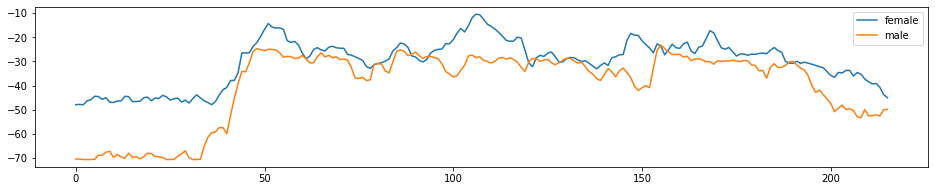

In [13]:
# Gender - Female; Emotion - angry
path = "/kaggle/input/ravdess-emotional-speech-audio/audio_speech_actors_01-24/Actor_08/03-01-05-02-01-01-08.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
female = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
female = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
print(len(female))

# Gender - Male; Emotion - angry
path = "/kaggle/input/ravdess-emotional-speech-audio/audio_speech_actors_01-24/Actor_09/03-01-05-01-01-01-09.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
male = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
male = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
print(len(male))

# Plot the two audio waves together
plt.figure(figsize=(16,10))
plt.subplot(3,1,1)
plt.plot(female, label='female')
plt.plot(male, label='male')
plt.legend()

In [14]:
# NOISE
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data
# STRETCH
def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate)
# SHIFT
def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)
# PITCH
def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)

In [15]:
# Trying different functions above
path = np.array(RAV_df['path'])[303]
data, sample_rate = librosa.load(path)

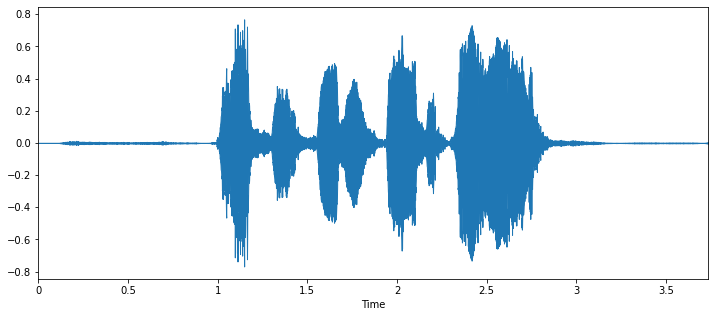

In [16]:
# NORMAL AUDIO
plt.figure(figsize=(12, 5))
librosa.display.waveplot(y=data, sr=sample_rate)
Audio(path)

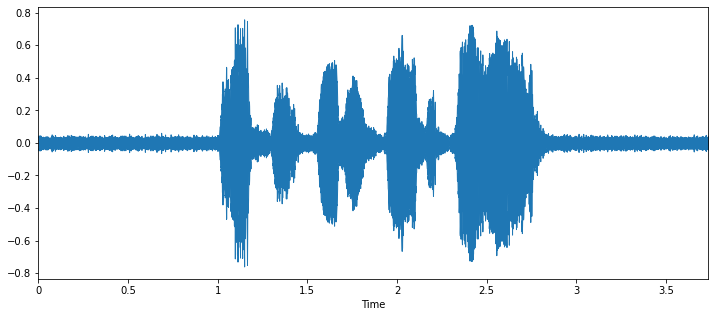

In [17]:
# AUDIO WITH NOISE
x = noise(data)
plt.figure(figsize=(12,5))
librosa.display.waveplot(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

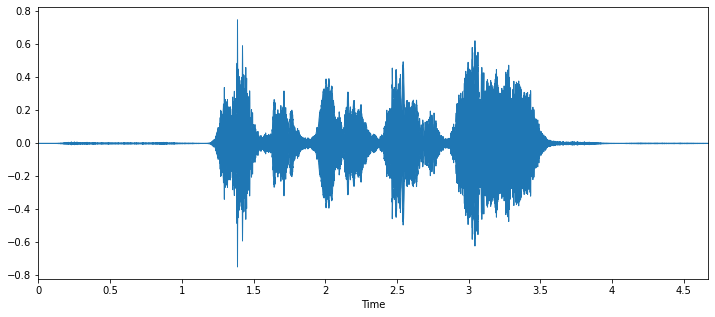

In [18]:
# STRETCHED AUDIO
x = stretch(data)
plt.figure(figsize=(12, 5))
librosa.display.waveplot(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

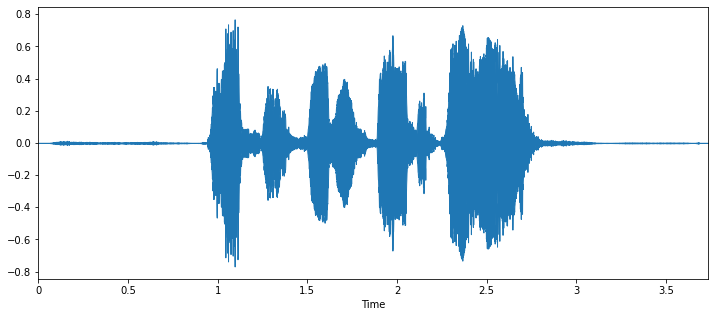

In [19]:
# SHIFTED AUDIO
x = shift(data)
plt.figure(figsize=(12,5))
librosa.display.waveplot(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

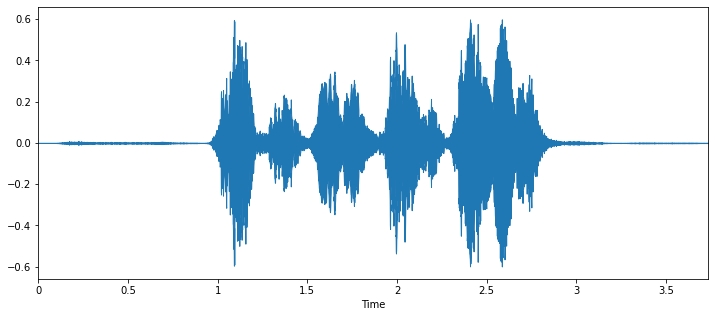

In [20]:
# AUDIO WITH PITCH
x = pitch(data, sample_rate)
plt.figure(figsize=(12, 5))
librosa.display.waveplot(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

# FEATURE EXTRACTION

In [25]:
# this step can used directly from saved feature .csv file
Features = pd.read_csv('../input/features/features.csv')
Features.head()

0           1          2          3          4         5  \
0 -637.701233  104.299019   4.894947  20.494011  12.552954  2.851410   
1 -596.908460   86.871936   9.470162  17.109819  11.198966  1.541056   
2 -698.086548   99.795929   1.892679  19.915264   7.532868  1.265761   
3 -279.141052   41.092949 -21.319229   7.802911 -13.140503 -9.407660   
4 -160.074686   17.576058  -2.147436   3.133417  -4.745002 -6.510771   

           6         7          8         9  ...         11        12  \
0  -6.633390 -4.091278 -10.423918 -6.406950  ...   0.172893 -1.170210   
1  -6.677264 -5.755428  -9.684472 -6.891256  ...   0.033803 -1.986515   
2  -9.188656 -5.798194 -12.299710 -4.976400  ...  -1.639542 -2.603761   
3 -15.580647 -6.097223 -24.700903 -9.640293  ... -10.305976 -4.092835   
4  -5.911591 -4.481506  -9.470598 -5.907823  ...  -4.088007 -1.817639   

         13         14        15         16        17        18        19  \
0 -5.292450  -0.573319  1.019471  -3.492607 -3.468123 -1.214944  1.971239   
1 -5.103855  -1.253110  0.514896  -3.268317 -4.502895  0.167153  0.256732   
2 -4.890347  -0.879222 -1.250208  -3.449960 -4.708529 -0.086224 -3.034044   
3 -5.817179 -10.731523 -0.823596 -15.885103 -2.014258 -6.173852 -5.331760   
4 -2.994765  -4.893176 -2.880436  -7.163400 -2.147345 -2.359248 -3.746217   

       labels  
0   male_calm  
1   male_calm  
2   male_calm  
3  male_angry  
4  male_angry  

[5 rows x 21 columns]

# DATA PREPROCESSING

In [26]:
X = Features.iloc[: ,:-1].values
Y = Features['labels'].values

In [27]:
# As this is a multiclass classification problem onehotencoding our Y.
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [28]:
# splitting data
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((3240, 20), (3240, 16), (1080, 20), (1080, 16))

In [29]:
# scaling our data with sklearn's Standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((3240, 20), (3240, 16), (1080, 20), (1080, 16))

# IMPLOYING CNN MODEL

In [30]:
x_traincnn =np.expand_dims(x_train, axis=2)
x_testcnn= np.expand_dims(x_test, axis=2)
x_traincnn.shape, y_train.shape, x_testcnn.shape, y_test.shape

((3240, 20, 1), (3240, 16), (1080, 20, 1), (1080, 16))

In [31]:
model = Sequential()
model.add(Conv1D(2048, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))
model.add(BatchNormalization())

model.add(Conv1D(1024, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))
model.add(BatchNormalization())

model.add(Conv1D(512, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))
model.add(BatchNormalization())

model.add(LSTM(256, return_sequences=True))

model.add(LSTM(128))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(16, activation='softmax'))

optimiser = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimiser,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 20, 2048)          12288     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 10, 2048)          0         
_________________________________________________________________
batch_normalization (BatchNo (None, 10, 2048)          8192      
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 10, 1024)          10486784  
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 5, 1024)           0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 5, 1024)           4096      
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 5, 512)            2

In [33]:
# computing the accuracy
print("Accuracy of our model on test data : " , model.evaluate(x_testcnn,y_test)[1]*100 , "%")

34/34 [==============================] - 0s 7ms/step - loss: 1.5817 - accuracy: 0.8120
Accuracy of our model on test data :  81.20370507240295 %


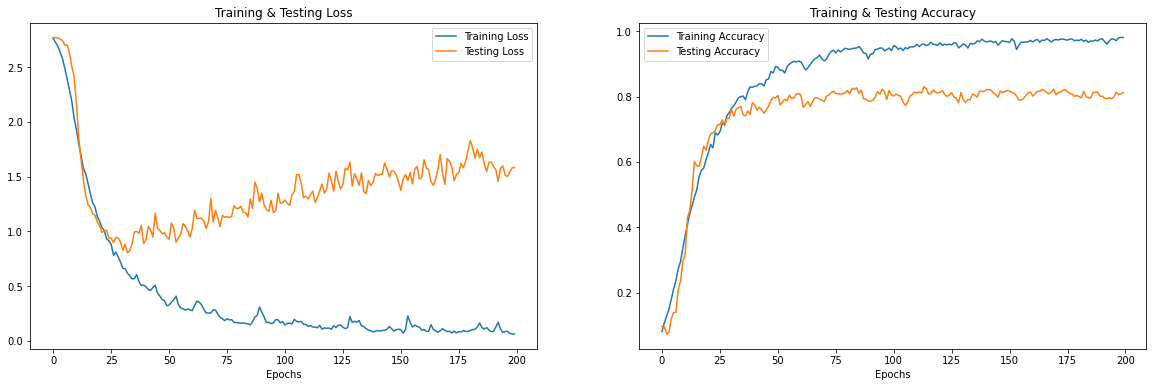

In [34]:
# training and test accuracy vs epochs plot
epochs = [i for i in range(200)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

### PREDICTION

In [35]:

pred_test = model.predict(x_testcnn)
y_pred = encoder.inverse_transform(pred_test)

y_test = encoder.inverse_transform(y_test)

df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test.flatten()

df.head(10)

Predicted Labels    Actual Labels
0     female_angry     female_angry
1         male_sad         male_sad
2  female_surprise     female_angry
3      female_calm      female_calm
4      female_calm      female_calm
5  female_surprise  female_surprise
6         male_sad         male_sad
7       male_happy       male_happy
8   female_disgust   female_disgust
9        male_fear        male_fear

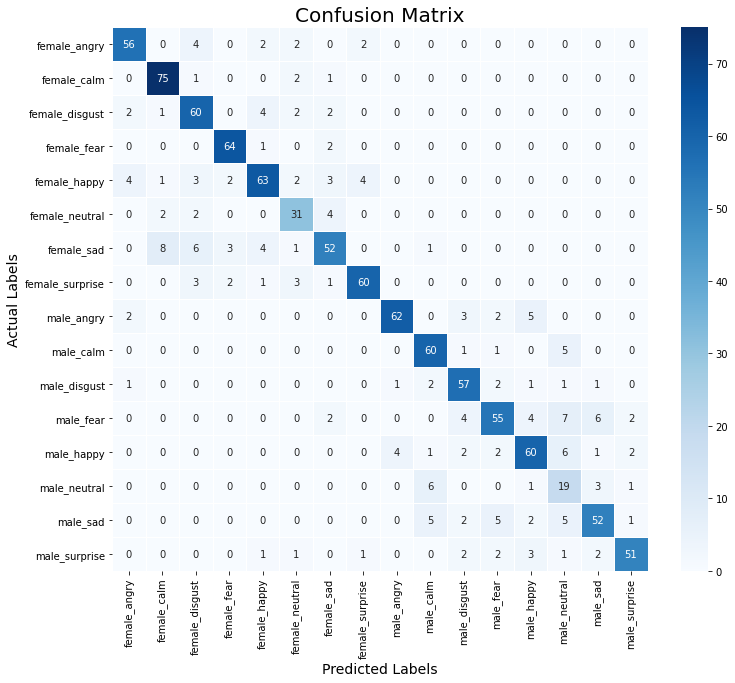

In [36]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

## SAVING THE MODEL

In [37]:
model_name = 'Emotion_Voice_Detection_Model.h5'
save_dir = os.path.join(os.getcwd(), 'saved_models')
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at /kaggle/working/saved_models/Emotion_Voice_Detection_Model.h5 


In [38]:
import json
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

In [39]:
from keras.models import model_from_json
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("/kaggle/working/saved_models/Emotion_Voice_Detection_Model.h5")
print("Loaded model from disk")

Loaded model from disk


# LIVE DEMO

In [40]:
data, sampling_rate = librosa.load('../input/output/output10.wav')

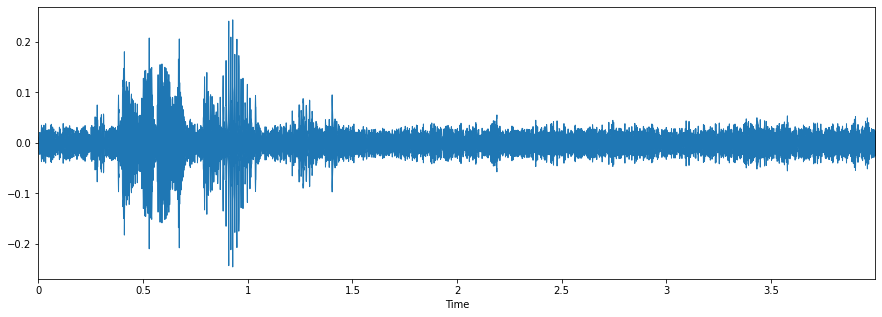

In [42]:
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

In [43]:
#livedf= pd.DataFrame(columns=['feature'])
X, sample_rate = librosa.load('../input/output/output10.wav', res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
sample_rate = np.array(sample_rate)
mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13),axis=0)
featurelive = mfccs
livedf2 = featurelive

In [44]:
livedf2= pd.DataFrame(data=livedf2)
livedf2 = livedf2.stack().to_frame().T
livedf2

0         1          2          3          4         5          6    \
           0         0          0          0          0         0          0   
0 -10.596061 -8.946511 -10.528728 -13.296783 -14.177729 -13.25804 -13.502738   

        7          8          9    ...        206        207        208  \
          0          0          0  ...          0          0          0   
0 -11.36202 -10.019709 -12.648233  ... -11.578989 -12.063125 -12.182924   

         209        210        211       212        213        214        215  
           0          0          0         0          0          0          0  
0 -12.072399 -13.011658 -12.680104 -14.36974 -13.681639 -12.795549 -13.263433  

[1 rows x 216 columns]

In [45]:
twodim= np.expand_dims(livedf2, axis=2)

In [46]:
livepreds = loaded_model.predict(twodim, 
                         batch_size=32, 
                         verbose=1)

1/1 [==============================] - 1s 957ms/step


In [47]:
livepreds

array([[3.2250948e-06, 3.6100307e-03, 2.3342846e-03, 2.2406097e-05,
        1.7844244e-04, 9.2410314e-01, 6.9004118e-02, 1.7600438e-05,
        2.7654128e-06, 3.0049527e-04, 2.5601514e-06, 1.5482929e-06,
        4.4414824e-07, 7.9448392e-07, 6.9831702e-05, 3.4829479e-04]],
      dtype=float32)

In [48]:
livepreds.shape

(1, 16)

In [49]:
livepredictions = (encoder.inverse_transform((livepreds)))
print(livepredictions)

[['female_neutral']]


# COMPONENT 2: MOVIE RECOMMENDATION SYSTEM


In [50]:
livepredictions=livepredictions.tolist()

In [51]:
string_version = " ".join(str(x) for x in livepredictions)
print(string_version)

['female_neutral']


In [52]:
# the emotion detected previously from live demo is stored in 'emotion' variable which is then used further in the code
emotion=string_version.split("'")
emotion=emotion[1].split("_")
gender=emotion[0]
emotion=emotion[1]

In [53]:
pip install bs4

     |████████████████████████████████| 97 kB 669 kB/s eta 0:00:01
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1273 sha256=3c34cb274e6553664b9a92287b52995355befeeb89dc4cb667002860ce5025c0
  Stored in directory: /root/.cache/pip/wheels/0a/9e/ba/20e5bbc1afef3a491f0b3bb74d508f99403aabe76eda2167ca
Successfully built bs4
Note: you may need to restart the kernel to use updated packages.


### IMPORTING LIBRARIES

In [54]:
from bs4 import BeautifulSoup as SOUP
import re
import requests as HTTP

### LIST OF LINKS FOR DIFFERENT GENRES

We have conducted a survey and obtained following results for male and female preference <br>
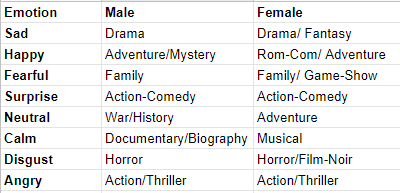

In [55]:
male_genre=["https://www.imdb.com/search/title/?title_type=feature,tv_movie,tv_series,tv_episode,tv_special,tv_miniseries,documentary,short,tv_short&release_date=2016-01-01,&user_rating=7.5,10.0&genres=history,war&colors=color",
           "https://www.imdb.com/search/title/?title_type=feature,tv_movie,tv_series,tv_episode,tv_special,tv_miniseries,documentary,short,tv_short&release_date=2016-01-01,&user_rating=7.5,10.0&genres=adventure,mystery&colors=color",
           "https://www.imdb.com/search/title/?title_type=feature,tv_movie,tv_series,tv_episode,tv_special,tv_miniseries,documentary,short,tv_short&release_date=2016-01-01,&user_rating=7.5,10.0&genres=drama&colors=color",
           "https://www.imdb.com/search/title/?title_type=feature,tv_movie,tv_series,tv_episode,tv_special,tv_miniseries,documentary,short,tv_short&release_date=2016-01-01,&user_rating=7.5,10.0&genres=biography,documentary&colors=color",
           "https://www.imdb.com/search/title/?title_type=feature,tv_movie,tv_series,tv_episode,tv_special,tv_miniseries,documentary,short,tv_short&release_date=2016-01-01,&user_rating=7.5,10.0&genres=action,comedy,crime&colors=color",
           "https://www.imdb.com/search/title/?title_type=feature,tv_movie,tv_series,tv_episode,tv_special,tv_miniseries,documentary,short,tv_short&release_date=2016-01-01,&user_rating=7.5,10.0&genres=action,thriller&colors=color",
           "https://www.imdb.com/search/title/?title_type=feature,tv_movie,tv_series,tv_episode,tv_special,tv_miniseries,documentary,short,tv_short&release_date=2016-01-01,&user_rating=7.5,10.0&genres=family&colors=color",
           "https://www.imdb.com/search/title/?title_type=feature,tv_movie,tv_series,tv_episode,tv_special,tv_miniseries,documentary,short,tv_short&release_date=2016-01-01,&user_rating=7.5,10.0&genres=horror&colors=color"]

In [56]:
female_genre=["https://www.imdb.com/search/title/?title_type=feature,tv_movie,tv_series,tv_episode,tv_special,tv_miniseries,documentary,short,tv_short&release_date=2016-01-01,&user_rating=7.5,10.0&genres=adventure&colors=color",
             "https://www.imdb.com/search/title/?title_type=feature,tv_movie,tv_series,tv_episode,tv_special,tv_miniseries,documentary,short,tv_short&release_date=2016-01-01,&user_rating=7.5,10.0&genres=adventure,comedy,romance&colors=color",
             "https://www.imdb.com/search/title/?title_type=feature,tv_movie,tv_series,tv_episode,tv_special,tv_miniseries,documentary,short,tv_short&release_date=2016-01-01,&user_rating=7.5,10.0&genres=drama,fantasy&colors=color",
             "https://www.imdb.com/search/title/?title_type=feature,tv_movie,tv_series,tv_episode,tv_special,tv_miniseries,documentary,short,tv_short&release_date=2016-01-01,&user_rating=7.5,10.0&genres=music,musical&colors=color",
             "https://www.imdb.com/search/title/?title_type=feature,tv_movie,tv_series,tv_episode,tv_special,tv_miniseries,documentary,short,tv_short&release_date=2016-01-01,&user_rating=7.5,10.0&genres=action,comedy,crime&colors=color",
             "https://www.imdb.com/search/title/?title_type=feature,tv_movie,tv_series,tv_episode,tv_special,tv_miniseries,documentary,short,tv_short&release_date=2016-01-01,&user_rating=7.5,10.0&genres=action,thriller&colors=color",
             "https://www.imdb.com/search/title/?title_type=feature,tv_movie,tv_series,tv_episode,tv_special,tv_miniseries,documentary,short,tv_short&release_date=2016-01-01,&user_rating=7.5,10.0&genres=family,game-show&colors=color",
             "https://www.imdb.com/search/title/?title_type=feature,tv_movie,tv_series,tv_episode,tv_special,tv_miniseries,documentary,short,tv_short&release_date=2016-01-01,&user_rating=7.5,10.0&genres=horror&colors=color"]

In [57]:
if(gender == "male"):    
    # IMDb Url for movie against emotion Neutral
    if(emotion == "neutral"):
        urlhere = male_genre[0]
  
    # IMDb Url for movie against emotion Happy
    elif(emotion == "happy"):
        urlhere = male_genre[1]
  
    # IMDb Url for movie against emotion Sad
    elif(emotion == "sad"):
        urlhere = male_genre[2]
  
    # IMDb Url for movie against emotion Calm
    elif(emotion == "calm"):
        urlhere = male_genre[3]
  
    # IMDb Url for movie against emotion Surprised
    elif(emotion == "surprised"):
        urlhere = male_genre[4]

    # IMDb Url for movie against emotion Angry
    elif(emotion == "angry"):
        urlhere = male_genre[5]

    # IMDb Url for  movie against emotion Fearful
    elif(emotion == "fear"):
        urlhere = male_genre[6]

    # IMDb Url for movie against emotion Disgust
    elif(emotion == "disgust"):
        urlhere = male_genre[7]
        
elif(gender=="female"):
    if(emotion == "neutral"):
        urlhere = female_genre[0]
  
    # IMDb Url for movie against emotion Happy
    elif(emotion == "happy"):
        urlhere = female_genre[1]
  
    # IMDb Url for movie against emotion Sad
    elif(emotion == "sad"):
        urlhere = female_genre[2]
  
    # IMDb Url for movie against emotion Calm
    elif(emotion == "calm"):
        urlhere = female_genre[3]
  
    # IMDb Url for movie against emotion Surprised
    elif(emotion == "surprised"):
        urlhere = female_genre[4]

    # IMDb Url for movie against emotion Angry
    elif(emotion == "angry"):
        urlhere = female_genre[5]

    # IMDb Url for movie against emotion Fearful
    elif(emotion == "fear"):
        urlhere = female_genre[6]

    # IMDb Url for movie against emotion Disgust
    elif(emotion == "disgust"):
        urlhere = female_genre[7]
        

In [58]:
response = HTTP.get(urlhere)
data = response.text
soup = SOUP(data, "lxml")

### SCRAPING THE TITLE OF THE MOVIE FROM THE IMBb WEBSITE

In [59]:
vbLf='\n'
TITLES = []
titles = soup.find_all('h3')
for t in titles:
      TITLES.append(t.text[4:].replace(vbLf,""))  

### SCRAPING THE URLs CORRESPONDING TO EACH MOVIE

In [60]:
URL_list = []
for item in soup.find_all(attrs={'class':'lister-item-header'}):
    for link in item.find_all('a',href=True):
        href=link.get('href')
        URL_list.append("https://www.imdb.com/"+href+"?ref_=adv_li_tt")

In [61]:
TITLES

['Squid Game(2021)',
 'No Time to Die(2021)',
 'Dune(2021)',
 'What If...?(2021– )',
 'Shang-Chi and the Legend of the Ten Rings(2021)',
 'Doom Patrol(2019– )',
 'Titans(I) (2018– )',
 'The Witcher(2019– )',
 'The Mandalorian(2019– )',
 'Loki(2021– )',
 'The Orville(2017– )',
 'Avengers: Endgame(2019)',
 'Boku no hîrô akademia(2016– )',
 'Killing Eve(2018–2022)',
 'Final Space(2018–2021)',
 'The Umbrella Academy(2019– )',
 "Zack Snyder's Justice League(2021)",
 'Superman and Lois(2021– )',
 'Invincible(2021– )',
 'Thor: Ragnarok(2017)',
 'Luca(2021)',
 'Demon Slayer: Kimetsu No Yaiba(2019– )',
 'Shadow and Bone(2021– )',
 'Deadpool 2(2018)',
 'Avengers: Infinity War(2018)',
 'Deadpool(2016)',
 'Star Trek: Picard(2020– )',
 'His Dark Materials(2019– )',
 'Spider-Man: Into the Spider-Verse(2018)',
 'Sweet Tooth(2021– )',
 'Guardians of the Galaxy Vol. 2(2017)',
 'Love, Death & Robots(2019– )',
 'The End of the F***ing World(2017–2019)',
 'Star Wars: The Bad Batch(2021– )',
 'Rogue One(20

### SCRAPPING THE RATINGS OF EACH MOVIE

In [62]:
RATINGS = []
ratings =soup.find_all("div",{'class':"inline-block ratings-imdb-rating"})
for r in ratings:
    RATINGS.append(r.text.replace(vbLf,""))
RATINGS

['8.3',
 '7.6',
 '8.4',
 '7.6',
 '7.9',
 '7.9',
 '7.6',
 '8.2',
 '8.8',
 '8.4',
 '8.0',
 '8.4',
 '8.4',
 '8.2',
 '8.3',
 '8.0',
 '8.1',
 '7.9',
 '8.7',
 '7.9',
 '7.5',
 '8.7',
 '7.7',
 '7.7',
 '8.4',
 '8.0',
 '7.5',
 '7.9',
 '8.4',
 '7.9',
 '7.6',
 '8.5',
 '8.1',
 '8.0',
 '7.8',
 '8.3',
 '8.4',
 '7.5',
 '8.7',
 '8.5',
 '7.6',
 '8.1',
 '8.3',
 '8.3',
 '7.9',
 '8.8',
 '8.0',
 '7.8',
 '7.7',
 '8.1']

In [63]:
# created the dataframe to store the scrapped information
data = pd.DataFrame(zip(TITLES, RATINGS, URL_list), columns = ["Title", "Ratings", "URL"])

In [64]:
data

Title Ratings  \
0                                  Squid Game(2021)     8.3   
1                              No Time to Die(2021)     7.6   
2                                        Dune(2021)     8.4   
3                               What If...?(2021– )     7.6   
4   Shang-Chi and the Legend of the Ten Rings(2021)     7.9   
5                               Doom Patrol(2019– )     7.9   
6                                Titans(I) (2018– )     7.6   
7                               The Witcher(2019– )     8.2   
8                           The Mandalorian(2019– )     8.8   
9                                      Loki(2021– )     8.4   
10                              The Orville(2017– )     8.0   
11                          Avengers: Endgame(2019)     8.4   
12                    Boku no hîrô akademia(2016– )     8.4   
13                           Killing Eve(2018–2022)     8.2   
14                           Final Space(2018–2021)     8.3   
15                     The Umbrella Academy(2019– )     8.0   
16               Zack Snyder's Justice League(2021)     8.1   
17                        Superman and Lois(2021– )     7.9   
18                               Invincible(2021– )     8.7   
19                             Thor: Ragnarok(2017)     7.9   
20                                       Luca(2021)     7.5   
21           Demon Slayer: Kimetsu No Yaiba(2019– )     8.7   
22                          Shadow and Bone(2021– )     7.7   
23                                 Deadpool 2(2018)     7.7   
24                     Avengers: Infinity War(2018)     8.4   
25                                   Deadpool(2016)     8.0   
26                        Star Trek: Picard(2020– )     7.5   
27                       His Dark Materials(2019– )     7.9   
28          Spider-Man: Into the Spider-Verse(2018)     8.4   
29                              Sweet Tooth(2021– )     7.9   
30             Guardians of the Galaxy Vol. 2(2017)     7.6   
31                     Love, Death & Robots(2019– )     8.5   
32          The End of the F***ing World(2017–2019)     8.1   
33                 Star Wars: The Bad Batch(2021– )     8.0   
34                                  Rogue One(2016)     7.8   
35                          Black Clover(2017–2021)     8.3   
36                                   Coco(I) (2017)     8.4   
37                             Doctor Strange(2016)     7.5   
38                           Jujutsu Kaisen(2020– )     8.7   
39                             Harley Quinn(2019– )     8.5   
40                                 Vaiana(I) (2016)     7.6   
41                                       Soul(2020)     8.1   
42                           Castlevania(2017–2021)     8.3   
43         Kimetsu no Yaiba: Mugen Ressha-Hen(2020)     8.3   
44                            The Terror(2018–2019)     7.9   
45           Barbaroslar: Akdeniz'in Kilici(2021– )     8.8   
46                                   Zootopia(2016)     8.0   
47                 Captain America: Civil War(2016)     7.8   
48              Mission: Impossible - Fallout(2018)     7.7   
49                            The Owl House(2020– )     8.1   

                                                  URL  
0   https://www.imdb.com//title/tt10919420/?ref_=a...  
1   https://www.imdb.com//title/tt2382320/?ref_=ad...  
2   https://www.imdb.com//title/tt1160419/?ref_=ad...  
3   https://www.imdb.com//title/tt10168312/?ref_=a...  
4   https://www.imdb.com//title/tt9376612/?ref_=ad...  
5   https://www.imdb.com//title/tt8416494/?ref_=ad...  
6   https://www.imdb.com//title/tt1043813/?ref_=ad...  
7   https://www.imdb.com//title/tt5180504/?ref_=ad...  
8   https://www.imdb.com//title/tt8111088/?ref_=ad...  
9   https://www.imdb.com//title/tt9140554/?ref_=ad...  
10  https://www.imdb.com//title/tt5691552/?ref_=ad...  
11  https://www.imdb.com//title/tt4154796/?ref_=ad...  
12  https://www.imdb.com//title/tt5626028/?ref_=ad...  
13  https://www.imdb.com//title/tt7016936/?ref_=